# 1 Data Understanding

## IMPORT PACKAGES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

# Data Modelling
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# import sklearn libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

## DATA OVERVIEW

In [2]:
data_path = os.path.join("Madu", "lead_scoring.csv")
print(data_path)


Madu\lead_scoring.csv


In [3]:
data = pd.read_csv(data_path)
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

### Keterangan data

1.	Prospect ID :	A unique ID with which the customer is identified.
2.	Lead Number :	A lead number assigned to each lead procured.
3.	Lead Origin :	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
4.	Lead Source :	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
5.	Do Not Email:	An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
6.	Do Not Call :	An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
7.	Converted   :	The target variable. Indicates whether a lead has been successfully converted or not.
8.	TotalVisits :	The total number of visits made by the customer on the website.
9.	Total Time Spent on Website	The total time spent by the customer on the website.
10.	Page Views Per Visit	Average number of pages on the website viewed during the visits.
11.	Last Activity	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
12.	Country	The country of the customer.
13.	Specialization	The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
14.	How did you hear about Madugital	The source from which the customer heard about Madugital.
15.	What is your current occupation	Indicates whether the customer is a student, unemployed or employed.
16.	What matters most to you in choosing this product	An option selected by the customer indicating what is their main motto behind buying this product.
17.	Search	Indicating whether the customer had seen the ad in any of the listed items.
18.	Magazine	
19.	Newspaper Article	
20.	Madugital Forum	
21.	Newspaper	
22.	Digital Advertisement	
23.	Through Recommendations	Indicates whether the customer came in through recommendations.
24.	Receive More Updates About Our Courses	Indicates whether the customer chose to receive more updates about the courses.
25.	Tags	Tags assigned to customers indicating the current status of the lead.
26.	Lead Quality	Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
27.	Update me on Supply Chain Content	Indicates whether the customer wants updates on the Supply Chain Content.
28.	Get updates on DM Content	Indicates whether the customer wants updates on the DM Content.
29.	Lead Profile	A lead level assigned to each customer based on their profile.
30.	City	The city of the customer.
31.	Asymmetrique Activity Index	An index and score assigned to each customer based on their activity and their profile
32.	Asymmetrique Profile Index	
33.	Asymmetrique Activity Score	
34.	Asymmetrique Profile Score	
35.	I agree to pay the amount through cheque	Indicates whether the customer has agreed to pay the amount through cheque or not.
36.	a free copy of Mastering The Healthy Live	Indicates whether the customer wants a free copy of 'Mastering the Healthy Live' or not.
37.	Last Notable Activity	The last notable acitivity performed by the customer.


In [5]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about Madugital,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,Madugital Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Indonesia,Select,Select,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Indonesia,Business Administration,Select,Student,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Indonesia,Media and Advertising,Word Of Mouth,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Jakarta,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Indonesia,Select,Other,Unemployed,Healthy for life,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Jakarta,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Quality Check

In [6]:
# melihat persebaran data (min, max, Quantile)
data.describe() # untuk data numeric

#data.describe(include=['O']) # untuk data categoric

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
data.nunique()

Prospect ID                                       9240
Lead Number                                       9240
Lead Origin                                          5
Lead Source                                         21
Do Not Email                                         2
Do Not Call                                          2
Converted                                            2
TotalVisits                                         41
Total Time Spent on Website                       1731
Page Views Per Visit                               114
Last Activity                                       17
Country                                             38
Specialization                                      19
How did you hear about Madugital                    10
What is your current occupation                      6
What matters most to you in choosing a product       3
Search                                               2
Magazine                                             1
Newspaper 

In [8]:
# melihat apakah ada kolom yang nilainya kosong
data.isnull().sum() # melihat jumlah value yang kosong

Prospect ID                                          0
Lead Number                                          0
Lead Origin                                          0
Lead Source                                         36
Do Not Email                                         0
Do Not Call                                          0
Converted                                            0
TotalVisits                                        137
Total Time Spent on Website                          0
Page Views Per Visit                               137
Last Activity                                      103
Country                                           2461
Specialization                                    1438
How did you hear about Madugital                  2207
What is your current occupation                   2690
What matters most to you in choosing a product    2709
Search                                               0
Magazine                                             0
Newspaper 

In [9]:
data.isna().mean() * 100 # persentase baris yang kosong dari keseluruhan

Prospect ID                                        0.000000
Lead Number                                        0.000000
Lead Origin                                        0.000000
Lead Source                                        0.389610
Do Not Email                                       0.000000
Do Not Call                                        0.000000
Converted                                          0.000000
TotalVisits                                        1.482684
Total Time Spent on Website                        0.000000
Page Views Per Visit                               1.482684
Last Activity                                      1.114719
Country                                           26.634199
Specialization                                    15.562771
How did you hear about Madugital                  23.885281
What is your current occupation                   29.112554
What matters most to you in choosing a product    29.318182
Search                                  

# 2 Data Preparation

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9204 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9103 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

## Handling Data

### Lead origin columns

In [11]:
## Untuk Kolom Prospect ID & Lead Number tidak ada masalah unique values dan non-null count sama yaitu `9240`
## untuk kolom Lead Origin memiliki value yang hanya 1 yaitu Quick Add Form, kita gabungkan dengan Lead Ads Form
print("\nBefore")
display(data['Lead Origin'].value_counts())


Before


Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [12]:
data['Lead Origin'] = np.where(data['Lead Origin'].str.contains("Add Form"), "Add Form", data['Lead Origin'])
print("\nAfter")
display(data['Lead Origin'].value_counts())


After


Lead Origin
Landing Page Submission    4886
API                        3580
Add Form                    719
Lead Import                  55
Name: count, dtype: int64

### Lead Source columns

In [13]:
## untuk kolom Lead Source, mari kita ganti Source yang kurang dari 1% populasi menjadi `Others`
# Tampilkan jumlah nilai untuk kolom 'Lead Source', dinormalisasi untuk menampilkan persentase
data['Lead Source'] = data['Lead Source'].fillna('Not Specified')
print("\nBefore")
display(data['Lead Source'].value_counts(normalize=True))


Before


Lead Source
Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
Not Specified        0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Social Media         0.000216
Press_Release        0.000216
Pay per Click Ads    0.000108
blog                 0.000108
WeLearn              0.000108
welearnblog_Home     0.000108
youtubechannel       0.000108
testone              0.000108
NC_EDM               0.000108
Name: proportion, dtype: float64

In [14]:
# Lanjutkan dengan kode untuk mengganti Lead Source yang menyumbang kurang dari 1% populasi dengan 'Others'
threshold = 0.01  # 1% threshold
sources_to_replace = data['Lead Source'].value_counts(normalize=True)[data['Lead Source'].value_counts(normalize=True) < threshold].index

# Ganti Lead Source yang menyumbang kurang dari 1% populasi dengan 'Others'
data['Lead Source'] = data['Lead Source'].apply(lambda x: 'Others' if x in sources_to_replace else x)
print("\nAfter")
display(data['Lead Source'].value_counts(normalize=True))


After


Lead Source
Google              0.310390
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Others              0.012879
Name: proportion, dtype: float64

### Total Visit Columns

In [15]:
display(data['TotalVisits'].describe()) ## ada null values, mari kita isi dengan `0`

data['TotalVisits'] = data['TotalVisits'].fillna(0)
display(data['TotalVisits'].describe()) 

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

count    9240.000000
mean        3.394156
std         4.836682
min         0.000000
25%         0.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Page Views Per Visit

In [16]:
display(data['Page Views Per Visit'].describe()) ## ada null values, mari kita isi dengan `0`

data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(0)
display(data['Page Views Per Visit'].describe()) 


count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

count    9240.000000
mean        2.327787
std         2.164258
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

### Last Activity Columns

In [17]:
## mari kita kelompokan aktivitas menjadi Good, Bad, dan Neutral
display(data['Last Activity'].value_counts())

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [18]:
# Definisikan kategori berdasarkan sudut pandang perusahaan (subjektif)
good_activities = ['Email Opened', 'Resubscribed to emails',  'Page Visited on Website', 'Form Submitted on Website', 'Email Link Clicked', 'Had a Phone Conversation', 'Approached upfront']
bad_activities = ['Email Bounced', 'Unreachable', 'Unsubscribed', 'Email Marked Spam']
neutral_activities = ['Email Received', 'SMS Sent', 'Olark Chat Conversation', 'Converted to Lead', 'View in browser link Clicked', 'Visited Booth in Tradeshow']

# Categorize 'Last Activity' menjadi Good, Bad, atau Neutral
data['Last Activity Category'] = data['Last Activity'].apply(lambda x: 'Good' if x in good_activities else ('Neutral' if x in neutral_activities else 'Bad')) # Jika `Last Activity` kosong, maka dianggap Bad

# Tampilkan
last_activity_category_counts = data['Last Activity Category'].value_counts()
display(last_activity_category_counts)

data = data.drop(columns=['Last Activity']) # kita coba drop saja

Last Activity Category
Good       4500
Neutral    4155
Bad         585
Name: count, dtype: int64

### Country

In [19]:
# Mari kita ubah menjadi Indonesia & Outside Indoneisa
print("\nBefore")
display(data['Country'].value_counts())



Before


Country
Indonesia               6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Nigeria                    4
Germany                    4
Canada                     4
Sweden                     3
Italy                      2
Belgium                    2
Ghana                      2
Philippines                2
Netherlands                2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Uganda                     2
Russia                     1
Sri Lanka                  1
Tanzania                   1
Kenya                      1
Malaysia                   1
Liberia                    1
Denmar

In [20]:
data['Country'] = np.where(data['Country']=='Indonesia', 'Indonesia', 'Outside Indonesia') # termasuk yang Null/None

print("\nAfter")
display(data['Country'].value_counts())


After


Country
Indonesia            6492
Outside Indonesia    2748
Name: count, dtype: int64

### Specialization

In [21]:
# ubah `Select` menjadi 'Not Specified', begitu pula yang Null/None
print("\nBefore")
display(data['Specialization'].value_counts())




Before


Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [22]:
data['Specialization'] = np.where(data['Specialization']=='Select', 'Not Specified', data['Specialization'].fillna('Not Specified'))

print("\nAfter")
display(data['Specialization'].value_counts())


After


Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

### How did you hear about Madugital

In [23]:
# ubah `Select` menjadi 'Not Specified', begitu pula yang Null/None
print("\nBefore")
display(data['How did you hear about Madugital'].value_counts())


Before


How did you hear about Madugital
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [24]:
data['How did you hear about Madugital'] = np.where(data['How did you hear about Madugital']=='Select', 'Not Specified', data['How did you hear about Madugital'].fillna('Not Specified'))

print("\nAfter")
display(data['How did you hear about Madugital'].value_counts())


After


How did you hear about Madugital
Not Specified            7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

### What is your current occupation

In [25]:
data['What is your current occupation'] = data['What is your current occupation'].fillna('Not Specified')
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Not Specified           2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

### What matters most to you in choosing a product

In [26]:
# ubah Null/None menjadi 'Not Specified'
data['What matters most to you in choosing a product'] = data['What matters most to you in choosing a product'].fillna('Not Specified')
data['What matters most to you in choosing a product'].value_counts()

What matters most to you in choosing a product
Healthy for life    6528
Not Specified       2709
Branding               2
Other                  1
Name: count, dtype: int64

### Tags Column

In [27]:
## untuk kolom Tags, mari kita ganti yang kurang dari 1% populasi menjadi `Others`
# Tampilkan jumlah nilai untuk kolom 'Tags', dinormalisasi untuk menampilkan persentase
data['Tags'] = data['Tags'].fillna('Not Specified')
tags_percentage = data['Tags'].value_counts(normalize=True)
print("\nBefore")
display(tags_percentage)


Before


Tags
Not Specified                                        0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
num

In [28]:
# Lanjutkan dengan kode untuk mengganti Tags yang menyumbang kurang dari 1% populasi dengan 'Others'
threshold = 0.01  # 1% threshold
sources_to_replace = tags_percentage[tags_percentage < threshold].index

# Ganti Tags yang menyumbang kurang dari 1% populasi dengan 'Others'
data['Tags'] = data['Tags'].apply(lambda x: 'Others' if x in sources_to_replace else x)
print("\nAfter")
display(data['Tags'].value_counts(normalize=True))


After


Tags
Not Specified                          0.362879
Will revert after reading the email    0.224242
Ringing                                0.130195
Interested in other courses            0.055519
Already a student                      0.050325
Closed by Horizzon                     0.038745
Others                                 0.032684
switched off                           0.025974
Busy                                   0.020130
Lost to EINS                           0.018939
Not doing further education            0.015693
Interested  in full time MBA           0.012662
Graduation in progress                 0.012013
Name: proportion, dtype: float64

### Leads quality columns

In [29]:
data['Lead Quality'] = data['Lead Quality'].fillna('Not Specified')
display(data['Lead Quality'].value_counts())

Lead Quality
Not Specified        4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

### Lead Profile

In [30]:
# ubah select jadi `Not Specified` dan yang null diisi sama
data['Lead Profile'] = np.where(data['Lead Profile']=='Select', 'Not Specified', data['Lead Profile'].fillna('Not Specified'))
data['Lead Profile'].value_counts()

Lead Profile
Not Specified                  6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

### City

In [31]:
# ubah select jadi `Not Specified` dan yang null diisi sama
data['City'] = np.where(data['City']=='Select', 'Not Specified', data['City'].fillna('Not Specified'))
data['City'].value_counts()

City
Not Specified                    3669
Jakarta                          3222
Bodetabek                         752
Other Cities                      686
Cities in Banten & Jawa Barat     457
Other Metro Cities                380
Tier II Cities                     74
Name: count, dtype: int64

### Asymmetrique Activity Score, Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Profile Index

In [32]:
# isi missing values dengan 0 untuk Score / 00.Zero untku Index
data['Asymmetrique Activity Score'] = data['Asymmetrique Activity Score'].fillna(0)
data['Asymmetrique Activity Index'] = data['Asymmetrique Activity Index'].fillna('00.Zero')

display(data['Asymmetrique Activity Score'].value_counts())
display(data['Asymmetrique Activity Index'].value_counts())


Asymmetrique Activity Score
0.0     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

Asymmetrique Activity Index
00.Zero      4218
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [33]:
data['Asymmetrique Profile Score'] = data['Asymmetrique Profile Score'].fillna(0)
data['Asymmetrique Profile Index'] = data['Asymmetrique Profile Index'].fillna('00.Zero')
display(data['Asymmetrique Profile Score'].value_counts())
display(data['Asymmetrique Profile Index'].value_counts())

Asymmetrique Profile Score
0.0     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

Asymmetrique Profile Index
00.Zero      4218
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

### Last Notable Activity

In [34]:
## untuk kolom Last Notable Activity, mari kita ganti yang kurang dari 1% populasi menjadi `Others`
# Tampilkan jumlah nilai untuk kolom 'Last Notable Activity', dinormalisasi untuk menampilkan persentase
data['Last Notable Activity'] = data['Last Notable Activity'].fillna('Not Specified')
act_percentage = data['Last Notable Activity'].value_counts(normalize=True)
print("\nBefore")
display(act_percentage)



Before


Last Notable Activity
Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: proportion, dtype: float64

In [35]:

# Lanjutkan dengan kode untuk mengganti Last Notable Activity yang menyumbang kurang dari 1% populasi dengan 'Others'
threshold = 0.01  # 1% threshold
sources_to_replace = act_percentage[act_percentage < threshold].index

# Ganti Last Notable Activity yang menyumbang kurang dari 1% populasi dengan 'Others'
data['Last Notable Activity'] = data['Last Notable Activity'].apply(lambda x: 'Others' if x in sources_to_replace else x)
print("\nAfter")
display(data['Last Notable Activity'].value_counts(normalize=True))


After


Last Notable Activity
Modified                   0.368723
Email Opened               0.305952
SMS Sent                   0.235065
Page Visited on Website    0.034416
Olark Chat Conversation    0.019805
Email Link Clicked         0.018723
Others                     0.017316
Name: proportion, dtype: float64

## No Need to handle

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Prospect ID                                     9240 non-null   object 
 1   Lead Number                                     9240 non-null   int64  
 2   Lead Origin                                     9240 non-null   object 
 3   Lead Source                                     9240 non-null   object 
 4   Do Not Email                                    9240 non-null   object 
 5   Do Not Call                                     9240 non-null   object 
 6   Converted                                       9240 non-null   int64  
 7   TotalVisits                                     9240 non-null   float64
 8   Total Time Spent on Website                     9240 non-null   int64  
 9   Page Views Per Visit                     

In [37]:
cols = ['Search', 'Magazine',
       'Newspaper Article', 'Madugital Telegram', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Products']
data[cols].value_counts() # kolom aman

Search  Magazine  Newspaper Article  Madugital Telegram  Newspaper  Digital Advertisement  Through Recommendations  Receive More Updates About Our Products
No      No        No                 No                  No         No                     No                       No                                         9217
Yes     No        No                 No                  No         No                     No                       No                                           11
No      No        No                 No                  No         No                     Yes                      No                                            4
                                                                    Yes                    No                       No                                            3
Yes     No        No                 No                  No         No                     Yes                      No                                            2
No      No        No    

In [38]:
data[['Update me on Supply Chain Content', 'Get updates on DM Content']].value_counts() # aman


Update me on Supply Chain Content  Get updates on DM Content
No                                 No                           9240
Name: count, dtype: int64

In [39]:
print(data['Do Not Email'].value_counts(),'\n') ## tidak ada yang perlu dihandling
print(data['Do Not Call'].value_counts(),'\n') ## tidak ada yang perlu dihandling
print(data['Converted'].value_counts(),'\n') ## tidak ada yang perlu dihandling



Do Not Email
No     8506
Yes     734
Name: count, dtype: int64 

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64 

Converted
0    5679
1    3561
Name: count, dtype: int64 



In [40]:
data[['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']].value_counts() # aman


I agree to pay the amount through cheque  A free copy of Mastering The Interview
No                                        No                                        6352
                                          Yes                                       2888
Name: count, dtype: int64

## Data Preparation

### Delete Duplicated data

In [41]:
# Membuat direktori 'data' jika belum ada
os.makedirs("data", exist_ok=True)

# Menghapus duplikat
data = data.drop_duplicates()

cols = ['I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Search', 'Magazine',
       'Newspaper Article', 'Madugital Telegram', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Products', 'Do Not Email', 'Do Not Call']

# Ganti 'Yes' dengan 1 dan 'No' dengan 0 pada kolom-kolom diatas
data[cols] = data[cols].replace({'Yes': 1, 'No': 0})

saved_file_path = os.path.join("data", "prepared_leads_scoring3.csv")
data.to_csv(saved_file_path, index=False)

C:\Users\rolex\AppData\Local\Temp\ipykernel_10052\3308260554.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cols] = data[cols].replace({'Yes': 1, 'No': 0})


In [42]:
# Identifikasi categorical dan numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove `Converted` kolom
numerical_cols.remove('Converted')
numerical_cols.remove('Lead Number')
categorical_cols.remove('Prospect ID')



In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorik
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Specified')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# menggabungkan transformer menjadi preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X = data.drop(columns=['Converted', 'Prospect ID', 'Lead Number'])
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessor to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Displaying the shape of the processed data
X_train_preprocessed.shape, X_test_preprocessed.shape

((7392, 123), (1848, 123))

# 4 Data Modelling

In [44]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about Madugital,What is your current occupation,What matters most to you in choosing a product,Search,Magazine,Newspaper Article,Madugital Telegram,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Products,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Last Activity Category
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Outside Indonesia,Not Specified,Not Specified,Unemployed,Healthy for life,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,0,0,Modified,Good
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Indonesia,Not Specified,Not Specified,Unemployed,Healthy for life,0,0,0,0,0,0,0,0,Ringing,Not Specified,0,0,Not Specified,Not Specified,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,Good
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Indonesia,Business Administration,Not Specified,Student,Healthy for life,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Jakarta,02.Medium,01.High,14.0,20.0,0,1,Email Opened,Good
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Indonesia,Media and Advertising,Word Of Mouth,Unemployed,Healthy for life,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Not Specified,Jakarta,02.Medium,01.High,13.0,17.0,0,0,Modified,Bad
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Indonesia,Not Specified,Other,Unemployed,Healthy for life,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Not Specified,Jakarta,02.Medium,01.High,15.0,18.0,0,0,Modified,Neutral


In [45]:
# Identifikasi categorical dan numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove `Converted` kolom
numerical_cols.remove('Converted')
numerical_cols.remove('Lead Number')
categorical_cols.remove('Prospect ID')

# Pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('scaler', StandardScaler())
])

# Pipeline untuk fitur kategorik
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Not Specified')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# menggabungkan transformer menjadi preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Splitting the data into training and testing sets
X = data.drop(columns=['Converted', 'Prospect ID', 'Lead Number'])
y = data['Converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying the preprocessor to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Displaying the shape of the processed data
X_train_preprocessed.shape, X_test_preprocessed.shape

((7392, 123), (1848, 123))

## Modelling

In [46]:
# Membuat model Logistic Regression dengan iterasi yang tinggi (untuk mencapai konvergensi model)
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train_preprocessed, y_train)

# Memprediksi dan mengevaluasi model
y_pred_logreg = logreg.predict(X_test_preprocessed)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1107
           1       0.95      0.90      0.92       741

    accuracy                           0.94      1848
   macro avg       0.94      0.93      0.94      1848
weighted avg       0.94      0.94      0.94      1848



In [47]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_preprocessed, y_train)

# Memprediksi dan mengevaluasi model
y_pred_dtree = dtree.predict(X_test_preprocessed)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dtree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1107
           1       0.90      0.90      0.90       741

    accuracy                           0.92      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.92      0.92      0.92      1848



In [48]:
# Membuat model Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_preprocessed, y_train)

# Memprediksi dan mengevaluasi model
y_pred_rf = rf.predict(X_test_preprocessed)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1107
           1       0.94      0.91      0.93       741

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



In [49]:
# Menghitung F1 Score untuk Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg)
print(f"F1 Score for Logistic Regression\t: {f1_logreg:.2f}")

# Menghitung F1 Score untuk Decision Tree
f1_dtree = f1_score(y_test, y_pred_dtree)
print(f"F1 Score for Decision Tree\t\t: {f1_dtree:.2f}")

# Menghitung F1 Score untuk Random Forest
f1_rf = f1_score(y_test, y_pred_rf)
print(f"F1 Score for Random Forest\t\t: {f1_rf:.2f}")

F1 Score for Logistic Regression	: 0.92
F1 Score for Decision Tree		: 0.90
F1 Score for Random Forest		: 0.93


# 5 Evaluation

In [50]:
# Membuat model RandomForest
rf = RandomForestClassifier(random_state=42)

# Menentukan grid hyperparameter
param_distributions = {
    'n_estimators': np.arange(100, 1001, 100),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(10, 101, 10),
    'min_samples_split': np.arange(2, 11, 1),
    'min_samples_leaf': np.arange(1, 11, 1),
    'bootstrap': [True, False]
}

# Mengatur RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Melatih RandomizedSearchCV pada data latih
rf_random_search.fit(X_train_preprocessed, y_train)

# Menemukan hyperparameter terbaik
best_params = rf_random_search.best_params_
print(f"Best Parameters: {best_params}")

# Mengevaluasi model dengan hyperparameter terbaik
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test_preprocessed)
print("Random Forest Classification Report with Best Parameters:")
print(classification_report(y_test, y_pred_rf_best))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\rolex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rolex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rolex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\rolex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

Best Parameters: {'n_estimators': np.int64(1000), 'min_samples_split': np.int64(7), 'min_samples_leaf': np.int64(1), 'max_features': 'sqrt', 'max_depth': np.int64(70), 'bootstrap': True}
Random Forest Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1107
           1       0.95      0.91      0.93       741

    accuracy                           0.94      1848
   macro avg       0.94      0.94      0.94      1848
weighted avg       0.94      0.94      0.94      1848



In [51]:
# Mengambil parameter terbaik
best_params = rf_random_search.best_params_

# Membuat model RandomForest baru dengan parameter ini
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Melatih model pada data latihan
best_rf_model.fit(X_train_preprocessed, y_train)

# Melakukan prediksi pada data uji
y_pred_best_rf = best_rf_model.predict(X_test_preprocessed)

# Menghitung skor F1
f1_score_best_rf = f1_score(y_test, y_pred_best_rf)
print(f"Skor F1 dengan Parameter Terbaik: {f1_score_best_rf:.2f}")

Skor F1 dengan Parameter Terbaik: 0.93


In [52]:
def get_feature_names(column_transformer):
    """Get feature names from a ColumnTransformer"""
    output_features = []

    for name, pipe, features in column_transformer.transformers_:
        if name == 'remainder':
            continue
        if hasattr(pipe, 'get_feature_names_out'):
            # If the pipeline step has 'get_feature_names_out' method
            feature_names = pipe.get_feature_names_out(features)
        else:
            # Otherwise, use the original feature names
            feature_names = features
        output_features.extend(feature_names)

    return output_features

In [53]:
# Inisialisasi daftar untuk menyimpan nama fitur
feature_names = []

# Loop melalui setiap transformer dalam ColumnTransformer
for transformer in preprocessor.transformers_: # karena kita tidak memiliki 'remainder'
    transformer_name, transformer_instance, column_names = transformer

    # Jika transformer memiliki metode 'get_feature_names_out', gunakan itu
    if hasattr(transformer_instance, 'named_steps'):
        for k, v in transformer_instance.named_steps.items():
            if k in ['scaler', 'onehot']:
                names = transformer_instance.named_steps[k].get_feature_names_out(column_names)
        feature_names.extend(names)
    else:
        # Jika tidak, hanya gunakan nama kolom asli
        feature_names.extend(column_names)

# Sekarang feature_names harus berisi nama fitur yang benar setelah preprocessing

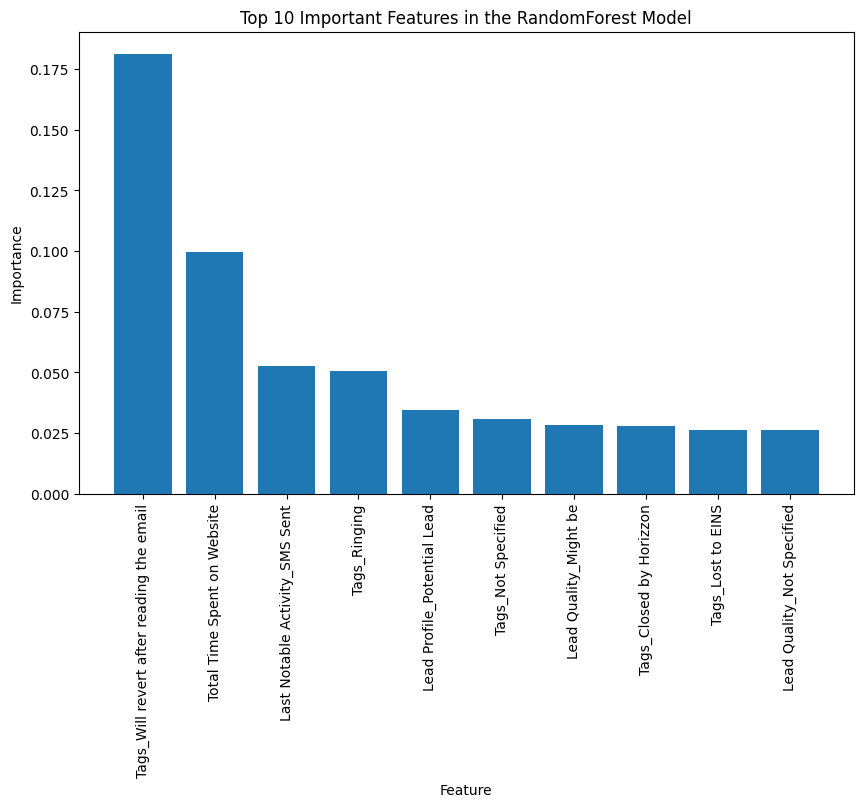

In [54]:
# Mendapatkan feature importances dari model RandomForest
importances = best_rf_model.feature_importances_

# Membuat pasangan fitur dan pentingnya, kemudian urutkan
feature_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

# Mengambil 10 fitur teratas
top_10_feature_importances = feature_importances[:10]

# Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features in the RandomForest Model")
plt.bar(*zip(*top_10_feature_importances))
plt.xticks(rotation=90)
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.show()

In [55]:
for a, b in top_10_feature_importances:
    print(a)

Tags_Will revert after reading the email
Total Time Spent on Website
Last Notable Activity_SMS Sent
Tags_Ringing
Lead Profile_Potential Lead
Tags_Not Specified
Lead Quality_Might be
Tags_Closed by Horizzon
Tags_Lost to EINS
Lead Quality_Not Specified


In [56]:
top_10_feature_importances

[('Tags_Will revert after reading the email', np.float64(0.18141346991610285)),
 ('Total Time Spent on Website', np.float64(0.09972270012565215)),
 ('Last Notable Activity_SMS Sent', np.float64(0.052620697512145556)),
 ('Tags_Ringing', np.float64(0.05067578393910034)),
 ('Lead Profile_Potential Lead', np.float64(0.0344642234175098)),
 ('Tags_Not Specified', np.float64(0.030711800793458685)),
 ('Lead Quality_Might be', np.float64(0.028148935633235284)),
 ('Tags_Closed by Horizzon', np.float64(0.027857421493026346)),
 ('Tags_Lost to EINS', np.float64(0.026382963310371627)),
 ('Lead Quality_Not Specified', np.float64(0.026324876570961272))]

## Save Models

In [57]:
if not os.path.exists('model'):
    os.mkdir('model')
else:
    print('folder `model` already exists!')

# save the model
filename = os.path.join('model', 'best_rf_model.sav')
pickle.dump(best_rf_model, open(filename, 'wb'))

# save the preprocessor
filename = os.path.join('model', 'preprocessor.sav')
pickle.dump(preprocessor, open(filename, 'wb'))

print('berhasil menyimpan model terbaik dan preprocessornya')

berhasil menyimpan model terbaik dan preprocessornya


# Deployment

In [58]:
# Load Model
filename = os.path.join('model', 'best_rf_model.sav')
file = open(filename,'rb')
best_rf_model = pickle.load(file)

# Load Preprocessor
filename = os.path.join('model', 'preprocessor.sav')
file = open(filename,'rb')
preprocessor = pickle.load(file)

In [59]:
# Data yang diberikan
data = {'Prospect ID': '2a369e36-ca95-4ca9-9e4f-9d27175aa320',
 'Lead Number': 7760608,
 'Lead Origin': 'Landing Page Submission',
 'Lead Source': 'blog',
 'Do Not Email': 0,
 'Do Not Call': 0,
 'Converted': 1,
 'TotalVisits': 8.0,
 'Total Time Spent on Website': 100,
 'Page Views Per Visit': 8.0,
 'Country': 'Indonesia',
 'Specialization': 'Travel and Tourism',
 'How did you hear about Madugital': 'Not Specified',
 'What is your current occupation': 'Unemployed',
 'What matters most to you in choosing a product': 'Healthy for life',
 'Search': 0,
 'Magazine': 0,
 'Newspaper Article': 0,
 'Madugital Telegram': 0,
 'Newspaper': 0,
 'Digital Advertisement': 0,
 'Through Recommendations': 0,
 'Receive More Updates About Our Products': 0,
 'Tags': 'Will revert after reading the email',
 'Lead Quality': 'Might be',
 'Update me on Supply Chain Content': 0,
 'Get updates on DM Content': 0,
 'Lead Profile': 'Not Specified',
 'City': 'Other Metro Cities',
 'Asymmetrique Activity Index': '02.Medium',
 'Asymmetrique Profile Index': '02.Medium',
 'Asymmetrique Activity Score': 15.0,
 'Asymmetrique Profile Score': 14.0,
 'I agree to pay the amount through cheque': 0,
 'A free copy of Mastering The Interview': 1,
 'Last Notable Activity': 'Email Opened',
 'Last Activity Category': 'Bad'}

In [60]:
# Mengubah data menjadi DataFrame
data_df = pd.DataFrame([data])

# Melakukan transformasi dengan preprocessor
data_preprocessed = preprocessor.transform(data_df)

# Melakukan prediksi probabilitas dengan model, dan membuat score dari hasil prediksi probabilitas
probability_result = best_rf_model.predict_proba(data_preprocessed)[0][1]
score = round(probability_result * 100, 2)

# membuat kategori leads untuk mempermudah identifikasi oleh salesman
if probability_result<0.5:
    category = 'COLD'
elif probability_result>=0.75:
    category = 'HOT'
else:
    category = 'WARM'

# menampilkan ID customer untuk follow-up oleh salesman
customer_id = data['Prospect ID']

# Menampilkan hasil prediksi
print(f"Customer dengan ID {customer_id}, masuk dalam kategori {category} leads, dengan score : {score}")

Customer dengan ID 2a369e36-ca95-4ca9-9e4f-9d27175aa320, masuk dalam kategori HOT leads, dengan score : 84.95
